# MSE Computer Vision - Assignment 2

## Read image paths

In [1]:
import os

TRAIN_PATH = 'data/train2/'
VAL_PATH = 'data/val/'
TST_PATH = 'data/test/'

def path_names_list(path, name_snipped):
    return sorted([os.path.join(path, fname)
                   for fname in os.listdir(path)
                   if fname.endswith(".png") and name_snipped in fname])
    
train_img_paths = path_names_list(TRAIN_PATH, "train_img")
train_lbl_paths = path_names_list(TRAIN_PATH, "train_lbl")
val_img_paths = path_names_list(VAL_PATH, "val_img")
val_lbl_paths = path_names_list(VAL_PATH, "val_lbl")
tst_img_paths = path_names_list(TST_PATH, "test_img")
tst_lbl_paths = path_names_list(TST_PATH, "test_lbl")


print("Length training data:", len(train_img_paths), len(train_lbl_paths))
for n, (img_path, lbl_path) in enumerate(zip(train_img_paths, train_lbl_paths)):
    print(f"{img_path} -> {lbl_path}")
    if n == 3:
        print()
        break

print("Length validation data:", len(val_img_paths), len(val_lbl_paths))
for n, (img_path, lbl_path) in enumerate(zip(val_img_paths, val_lbl_paths)):
    print(f"{img_path} -> {lbl_path}")
    if n == 3:
        print()
        break
        
print("Length test data:", len(tst_img_paths), len(tst_lbl_paths))
for n, (img_path, lbl_path) in enumerate(zip(tst_img_paths, tst_lbl_paths)):
    print(f"{img_path} -> {lbl_path}")
    if n == 3:
        break


Length training data: 23520 23520
data/train2/train_img_000_00.png -> data/train2/train_lbl_000_00.png
data/train2/train_img_000_01.png -> data/train2/train_lbl_000_01.png
data/train2/train_img_000_02.png -> data/train2/train_lbl_000_02.png
data/train2/train_img_000_03.png -> data/train2/train_lbl_000_03.png

Length validation data: 8544 8544
data/val/val_img_000_00.png -> data/val/val_lbl_000_00.png
data/val/val_img_000_01.png -> data/val/val_lbl_000_01.png
data/val/val_img_000_02.png -> data/val/val_lbl_000_02.png
data/val/val_img_000_03.png -> data/val/val_lbl_000_03.png

Length test data: 1888 1888
data/test/test_img_000_00.png -> data/test/test_lbl_000_00.png
data/test/test_img_000_01.png -> data/test/test_lbl_000_01.png
data/test/test_img_000_02.png -> data/test/test_lbl_000_02.png
data/test/test_img_000_03.png -> data/test/test_lbl_000_03.png


## Dataloader

In [20]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

IMG_SHAPE = 128

def normalize(image, mask):
    image = tf.cast(image, tf.float32) / 255.0
    mask += 1 # to avoid negative labels
    return image, mask

def load_and_preprocess(img_filepath, mask_filepath):
    img = tf.io.read_file(img_filepath)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SHAPE, IMG_SHAPE])

    mask = tf.io.read_file(mask_filepath)
    mask = tf.io.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, [IMG_SHAPE, IMG_SHAPE])

    img, mask = normalize(img, mask)

    return img, mask


AUTO = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32

# prepare data loaders
train_img_paths, train_lbl_paths = shuffle(train_img_paths, train_lbl_paths, random_state=42)
val_img_paths, val_lbl_paths = shuffle(val_img_paths, val_lbl_paths, random_state=42)
tst_img_paths, tst_lbl_paths = shuffle(tst_img_paths, tst_lbl_paths, random_state=42)

trainloader = tf.data.Dataset.from_tensor_slices((train_img_paths, train_lbl_paths))
valloader = tf.data.Dataset.from_tensor_slices((val_img_paths, val_lbl_paths))
tstloader = tf.data.Dataset.from_tensor_slices((tst_img_paths, tst_lbl_paths))


trainloader = (
    trainloader
    .shuffle(1024)
    .map(load_and_preprocess, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valloader = (
    valloader
    .map(load_and_preprocess, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

tstloader = (
    tstloader
    .map(load_and_preprocess, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

Error in callback <function _WandbInit._resume_backend at 0x7f92848865e0> (for pre_run_cell):


Exception: The wandb backend process has shutdown

Error in callback <function _WandbInit._pause_backend at 0x7f9284886af0> (for post_run_cell):


Exception: The wandb backend process has shutdown

In [3]:
labels = [
    #  name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    [  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ],
    [  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ],
    [  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ],
    [  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ],
    [  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ],
    [  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ],
    [  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ],
    [  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ],
    [  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ],
    [  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ],
    [  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ],
    [  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ],
    [  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ],
    [  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ],
    [  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ],
    [  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ],
    [  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ],
    [  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ],
    [  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ],
    [  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ],
    [  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ],
    [  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ],
    [  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ],
    [  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ],
    [  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ],
    [  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ],
    [  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ],
    [  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ],
    [  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ],
    [  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ],
    [  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ],
    [  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ],
    [  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ],
    [  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ],
    [  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ],
]

# segmentation_classes = [label[0] for label in labels]
SEGMENTATION_CLASSES_DICT = {n: label[0] for n, label in enumerate(labels) if label[0] != "license plate"}
SEGMENTATION_CLASSES_DICT[-1] = "license plate"

OUTPUT_CHANNEL = len(SEGMENTATION_CLASSES_DICT)
print(f"There are {OUTPUT_CHANNEL} segmentatin classes.")
print(SEGMENTATION_CLASSES_DICT)

There are 35 segmentatin classes.
{0: 'unlabeled', 1: 'ego vehicle', 2: 'rectification border', 3: 'out of roi', 4: 'static', 5: 'dynamic', 6: 'ground', 7: 'road', 8: 'sidewalk', 9: 'parking', 10: 'rail track', 11: 'building', 12: 'wall', 13: 'fence', 14: 'guard rail', 15: 'bridge', 16: 'tunnel', 17: 'pole', 18: 'polegroup', 19: 'traffic light', 20: 'traffic sign', 21: 'vegetation', 22: 'terrain', 23: 'sky', 24: 'person', 25: 'rider', 26: 'car', 27: 'truck', 28: 'bus', 29: 'caravan', 30: 'trailer', 31: 'train', 32: 'motorcycle', 33: 'bicycle', -1: 'license plate'}


## Visualize

Error in callback <function _WandbInit._resume_backend at 0x7f92848865e0> (for pre_run_cell):


Exception: The wandb backend process has shutdown

[[12.  12.  12.  ...  8.   4.   4. ]
 [12.  12.  12.  ...  8.   4.   4. ]
 [12.  12.  12.  ...  8.   4.   4. ]
 ...
 [27.  27.  27.  ... 15.5  4.   4. ]
 [27.  27.  27.  ... 15.5  4.   4. ]
 [27.  27.  27.  ... 15.5  4.   4. ]]
tf.Tensor(
[[[0.16666667 0.19411765 0.16960785]
  [0.15980393 0.18921569 0.16862746]
  [0.1627451  0.18627451 0.16764706]
  ...
  [0.19411765 0.24019608 0.2372549 ]
  [0.19411765 0.24117647 0.24117647]
  [0.19117647 0.24117647 0.24019608]]

 [[0.16470589 0.19215687 0.16862746]
  [0.16078432 0.19117647 0.16568628]
  [0.16176471 0.1882353  0.16764706]
  ...
  [0.19411765 0.24019608 0.23921569]
  [0.19215687 0.23921569 0.24019608]
  [0.19411765 0.24019608 0.24215686]]

 [[0.16470589 0.19215687 0.16960785]
  [0.16176471 0.18921569 0.1627451 ]
  [0.16176471 0.18921569 0.16764706]
  ...
  [0.19313726 0.24019608 0.24215686]
  [0.19313726 0.23921569 0.24215686]
  [0.19019608 0.23627451 0.2382353 ]]

 ...

 [[0.25490198 0.28921568 0.2627451 ]
  [0.26078433 0.29705882 0.2

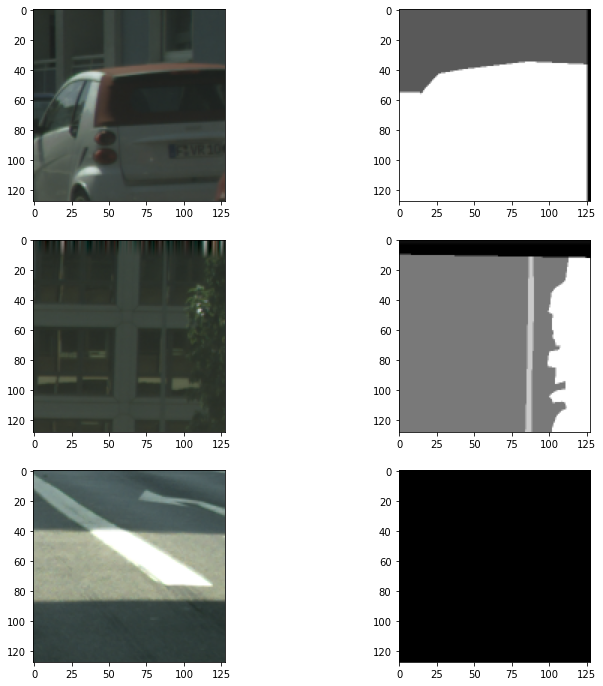

Error in callback <function _WandbInit._pause_backend at 0x7f9284886af0> (for post_run_cell):


Exception: The wandb backend process has shutdown

In [22]:
import matplotlib.pyplot as plt

num_example_to_display = 3
img, mask = next(iter(valloader))
fig, axs = plt.subplots(nrows=num_example_to_display, ncols=2, figsize=(12,4*num_example_to_display))
  
for i in range(num_example_to_display):
#     print(img[i])
    print(np.squeeze(mask[i],-1))
    print(img[i])
    axs[i][0].imshow(img[i])
    axs[i][1].imshow(np.squeeze(mask[i],-1), cmap='gray');

## Model

In [5]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import keras

In [6]:
def fcn_simple_no_border(input_height:int, input_width:int) -> keras.Model:
    """
    Create a simple fcn model for semantic segmentation with 2 classes
    """
    model = keras.Sequential()
    
    # we use grayscale (1-channel input)
    
    # (used to define input shape on the first layers)
    model.add(keras.layers.Layer(input_shape=(input_height , input_width, 3)))
    
    # add 3 convolutional layers with 3x3 filters
    model.add(keras.layers.Convolution2D(filters=4, kernel_size=3, strides=(2, 2), padding='same', activation='relu'))
    model.add(keras.layers.Conv2DTranspose(filters=4, kernel_size=3, strides=(2, 2), padding='same', activation='relu'))
    model.add(keras.layers.Convolution2D(filters=4, kernel_size=3, padding='same', activation='relu'))
    
    # go to logits which is the number of classes and add sigmoid layer for activation
    model.add(keras.layers.Convolution2D(filters=1, kernel_size=1, activation=None, 
                                         kernel_initializer=keras.initializers.TruncatedNormal(mean=0.0, stddev=0.001, seed=None)))
    model.add(keras.layers.Activation('sigmoid'))
    
    # reshape so that we have a sample for each pixel
    model.add(keras.layers.Reshape(target_shape=(input_height, input_width, 1)))
    
    return model

In [7]:
def model_u(img_shape, output_channels):
    model = keras.Sequential()
    model.add(keras.layers.Layer(input_shape=(img_shape , img_shape, 3)))
    
    # down
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    # up
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2DTranspose(filters=256, kernel_size=(2,2), strides=(2,2), padding='same'))
    
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2DTranspose(filters=128, kernel_size=(2,2), strides=(2,2), padding='same'))
    
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2DTranspose(filters=64, kernel_size=(2,2), strides=(2,2), padding='same'))
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2DTranspose(filters=32, kernel_size=(2,2), strides=(2,2), padding='same'))
    
    model.add(Conv2D(output_channels, (3, 3), activation='softmax', padding='same'))
    
    return model

## Compile Model

In [8]:
tf.keras.backend.clear_session()
# model = SegmentationModel().prepare_model(OUTPUT_CHANNEL)
model = model_u(IMG_SHAPE, OUTPUT_CHANNEL)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer (Layer)                (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

## Callbacks

In [9]:
from datetime import date

today = date.today()
d1 = today.strftime("%d/%m/%Y") # dd/mm/YY

# return dictionary with segmentation classes (key->number, value->name)
def labels():
    return SEGMENTATION_CLASSES_DICT

# util function for generating interactive image mask from components
def wandb_mask(bg_img, pred_mask, true_mask):
  return wandb.Image(bg_img, masks={
      "prediction" : {
          "mask_data" : pred_mask, 
          "class_labels" : labels()
      },
      "ground truth" : {
          "mask_data" : true_mask, 
          "class_labels" : labels()
      }
    }
  )

# early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# get epochs outputs
output_epoch_callback = tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')
# always safe best model
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(f"models/2022-01-05_best_model.h5",save_best_only=True)

## Train

In [10]:
import wandb
from wandb.keras import WandbCallback

!wandb login

# TODO Safe checkpoint

wandb: Currently logged in as: marcofuchs (use `wandb login --relogin` to force relogin)


In [11]:
wandb.init(project='image-segmentation', reinit=True)

EPOCHS = 25

history = model.fit(trainloader, 
              epochs=EPOCHS, 
              validation_data=valloader,
              callbacks=[early_stopping_callback, WandbCallback(), output_epoch_callback, model_checkpoint_callback])

model.save(f'models/')
wandb.finish()

wandb: Currently logged in as: marcofuchs (use `wandb login --relogin` to force relogin)


Epoch 1/25
 25/735 [>.............................] - ETA: 29:28 - loss: 3.5174

wandb: Network error (ReadTimeout), entering retry loop.


 35/735 [>.............................] - ETA: 29:05 - loss: 3.2850

KeyboardInterrupt: 

In [ ]:
# visualizing losses and accuracy
print(history.history.keys())

train_loss = history.history['loss']
val_loss   = history.history['val_loss']
xc         = range(EPOCHS)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)

## Prediction

In [12]:
from pycm import *

def confusion_matrix(pred_mask, true_mask):

    # 2D -> 1D Array
    pred = pred_mask.ravel()
    true = true_mask.ravel()

    # Create Classification metrics and plot confusion matrix
    cm = ConfusionMatrix(actual_vector=true, predict_vector=pred)
#     print(cm.classes)
#     cm.stat(summary=True)
    cm.plot()

def calc_accuracy(pred_mask, true_mask):
    # Count correct and wrong prediction
    true_prediction = np.count_nonzero((pred_mask == true_mask))
    false_prediction = np.count_nonzero((pred_mask != true_mask))
    accuracy_percentage = true_prediction*100/(false_prediction + true_prediction)
#     print(f"Accuracy: {true_prediction}/{false_prediction+true_prediction} = {accuracy_percentage:.1f}%")
    return accuracy_percentage

In [13]:
# Load model, if already trained
from keras.models import load_model

# model_ = load_model('model.15-0.76.h5')
model = load_model('models/2022-01-05_best_model.h5')

Accuracy for 29 test images: 51.7 %
[[ 4.   4.   4.  ...  4.   4.   4. ]
 [ 4.   4.   4.  ...  4.   4.   4. ]
 [13.  13.  13.  ... 13.  13.  13. ]
 ...
 [12.  17.  22.  ... 12.  12.  12. ]
 [12.  14.5 22.  ... 12.  12.  12. ]
 [12.  12.  19.5 ... 12.  12.  12. ]]
[[8. 8. 8. ... 9. 9. 9.]
 [8. 8. 8. ... 9. 9. 9.]
 [8. 8. 8. ... 9. 9. 9.]
 ...
 [3. 3. 3. ... 3. 3. 3.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]]
[[22.  22.  22.  ... 13.   4.   4. ]
 [22.  22.  22.  ... 13.   4.   4. ]
 [22.  22.  22.  ... 13.   4.   4. ]
 ...
 [14.  14.  14.  ...  9.   4.   4. ]
 [14.  14.  14.  ...  9.   4.   4. ]
 [11.5 14.  14.  ...  9.   4.   4. ]]
[[ 4.  4.  4. ... 13. 13. 13.]
 [ 4.  4.  4. ... 13. 13. 13.]
 [ 4.  4.  4. ... 13. 13. 13.]
 ...
 [ 4.  4.  4. ... 13. 13. 13.]
 [ 4.  4.  4. ... 13. 13. 13.]
 [ 4.  4.  4. ... 13. 13. 13.]]
[[7. 7. 7. ... 7. 7. 7.]
 [7. 7. 7. ... 7. 7. 7.]
 [7. 7. 7. ... 7. 7. 7.]
 ...
 [7. 7. 7. ... 7. 7. 7.]
 [7. 7. 7. ... 7. 7. 7.]
 [7. 7. 7. ... 7. 7. 7.]]


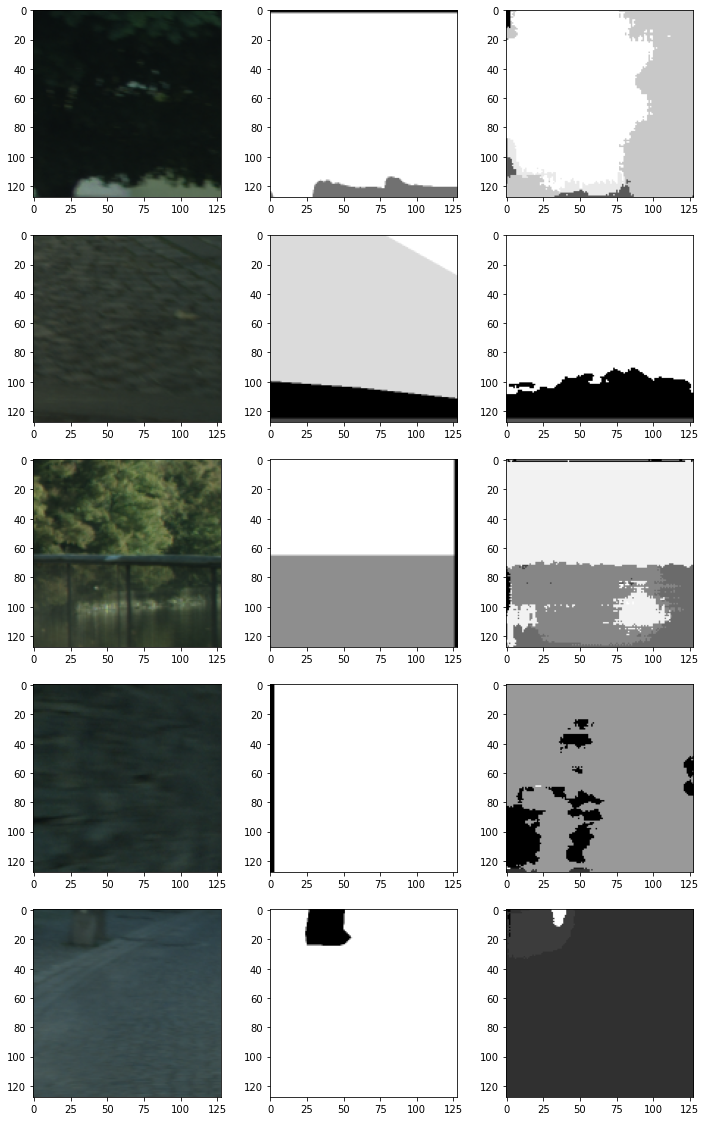

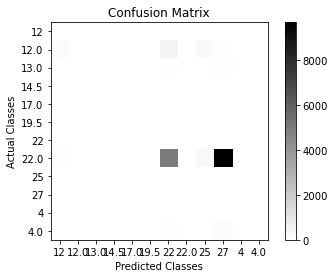

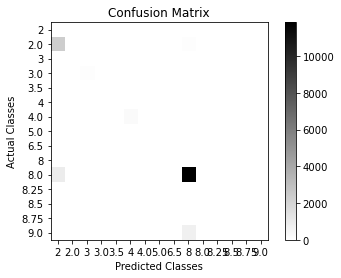

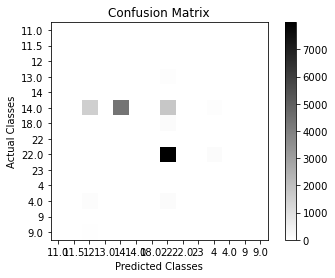

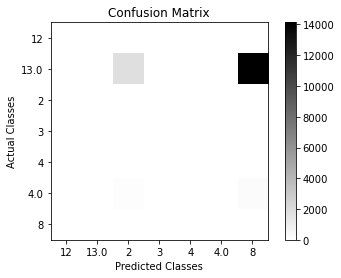

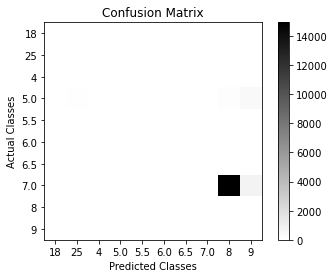

Exception in thread NetStatThr:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/compvis/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/envs/compvis/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/envs/compvis/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 152, in check_network_status
    status_response = self._interface.communicate_network_status()
  File "/opt/anaconda3/envs/compvis/lib/python3.8/site-packages/wandb/sdk/interface/interface.py", line 125, in communicate_network_status
    resp = self._communicate_network_status(status)
  File "/opt/anaconda3/envs/compvis/lib/python3.8/site-packages/wandb/sdk/interface/interface_shared.py", line 388, in _communicate_network_status
    resp = self._communicate(req, local=True)
  File "/opt/anaconda3/envs/compvis/lib/python3.8/site-packages/wandb/sdk/interface/interface_shared.py", line 213, in _c

In [16]:
val_img, val_mask = next(iter(tstloader))

pred_mask = model.predict(val_img)
pred_mask = np.argmax(pred_mask, axis=-1)
pred_mask = np.expand_dims(pred_mask, axis=-1)

num_accuracy = 29
accuracy = np.mean([calc_accuracy(np.squeeze(pred_mask[i],-1), np.squeeze(val_mask[i],-1)) for i in range(num_accuracy)])
print(f"Accuracy for {num_accuracy} test images: {accuracy:.1f} %")

num_example_to_display = 5
fig, axs = plt.subplots(nrows=num_example_to_display, ncols=3, figsize=(12,4*num_example_to_display))
for i in range(num_example_to_display):
    confusion_matrix(np.squeeze(pred_mask[i],-1), np.squeeze(val_mask[i],-1))
    
    axs[i][0].imshow(val_img[i]);
    axs[i][1].imshow(np.squeeze(val_mask[i],-1), cmap='gray')
    print(np.squeeze(val_mask[i],-1))
    axs[i][2].imshow(np.squeeze(pred_mask[i],-1), cmap='gray')